# 📤 IMPORT LIBRARIES

In [137]:
import numpy as np
import pandas as pd
from scipy import stats
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 💾 CHECK OUT THE DATA

In [138]:
df_item = pd.read_csv("Documents/Mentoria_stack/dataset/olist_order_items_dataset.csv")
df_reviews = pd.read_csv("Documents/Mentoria_stack/dataset/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("Documents/Mentoria_stack/dataset/olist_orders_dataset.csv")
df_products = pd.read_csv("Documents/Mentoria_stack/dataset/olist_products_dataset.csv")
df_geolocation = pd.read_csv("Documents/Mentoria_stack/dataset/olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("Documents/Mentoria_stack/dataset/olist_sellers_dataset.csv")
df_order_pay = pd.read_csv("Documents/Mentoria_stack/dataset/olist_order_payments_dataset.csv")
df_customers = pd.read_csv("Documents/Mentoria_stack/dataset/olist_customers_dataset.csv")
df_category = pd.read_csv("Documents/Mentoria_stack/dataset/product_category_name_translation.csv")

**ALL IN ONE**

In [139]:
# merge all the tables in one dataframe
df_train = df_orders.merge(df_item, on='order_id', how='left')
df_train = df_train.merge(df_order_pay, on='order_id', how='outer', validate='m:m')
df_train = df_train.merge(df_reviews, on='order_id', how='outer')
df_train = df_train.merge(df_products, on='product_id', how='outer')
df_train = df_train.merge(df_customers, on='customer_id', how='outer')
df_train = df_train.merge(df_sellers, on='seller_id', how='outer')

In [140]:
df_train.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP


In [141]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

Correction dates

In [142]:
# We also need to convert datetime features to the correct format
df_train['order_purchase_timestamp'] = pd.to_datetime(df_train.order_purchase_timestamp)
df_train['order_approved_at'] = pd.to_datetime(df_train.order_approved_at)
df_train['order_delivered_carrier_date'] = pd.to_datetime(df_train.order_delivered_carrier_date)
df_train['order_delivered_customer_date'] = pd.to_datetime(df_train.order_delivered_customer_date)
df_train['order_estimated_delivery_date'] = pd.to_datetime(df_train.order_estimated_delivery_date)
df_train['shipping_limit_date'] = pd.to_datetime(df_train.shipping_limit_date)
df_train['review_creation_date'] = pd.to_datetime(df_train.review_creation_date)

In [143]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  

CLEAN DATA

In [144]:
df_train.shape

(119143, 39)

<iframe src="https://www.kaggle.com/embed/fekmea/preparation-olist-dataset/notebook?cellIds=10&kernelSessionId=80861728" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Preparation Olist dataset"></iframe>

In [145]:
df_train.isnull().sum().sort_values(ascending = False).head()

review_comment_title             105154
review_comment_message            68898
order_delivered_customer_date      3421
product_photos_qty                 2542
product_category_name              2542
dtype: int64

In [146]:
# We may drop the review_comment_title column, as all values are null
df_train.drop(['review_comment_title'], axis=1, inplace=True)

Default review comment message

In [147]:
df_train['review_comment_message'] = df_train['review_comment_message'].fillna('No message')

In [148]:
df_train.isnull().sum().sort_values(ascending = False)

order_delivered_customer_date    3421
product_photos_qty               2542
product_description_lenght       2542
product_name_lenght              2542
product_category_name            2542
order_delivered_carrier_date     2086
review_score                      997
review_id                         997
review_answer_timestamp           997
review_creation_date              997
product_width_cm                  853
product_height_cm                 853
product_length_cm                 853
product_weight_g                  853
seller_city                       833
seller_zip_code_prefix            833
seller_state                      833
product_id                        833
shipping_limit_date               833
order_item_id                     833
seller_id                         833
freight_value                     833
price                             833
order_approved_at                 177
payment_installments                3
payment_value                       3
payment_sequ

Drop nan values

In [149]:
df_train_0 = df_train.shape[0]
#Remove missing values with dropna
df_train= df_train.dropna()
df_train_1 = df_train.shape[0]
print(f'{round(((df_train_0-df_train_1)/df_train_1)*100,2)}% nan values points were eliminated')

5.24% nan values points were eliminated


In [181]:
df_train.set_index('order_approved_at')

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,month,date
order_approved_at,,,,,,,,,,,,,,,,,,,,,
2017-10-02 11:07:15,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,10,2017-10-02
2017-10-02 11:07:15,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,10,2017-10-02
2017-10-02 11:07:15,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,10,2017-10-02
2017-08-15 20:05:16,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP,8,2017-08-15
2017-08-02 18:43:15,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP,8,2017-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-10 21:25:22,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,...,20.0,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,88490.0,paulo lopes,SC,8,2018-08-10
2018-07-05 16:17:52,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,...,28.0,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,13660.0,porto ferreira,SP,7,2018-07-05
2018-07-24 11:24:27,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16,1.0,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,...,30.0,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,13478.0,americana,SP,7,2018-07-24


In [167]:
df_train.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,month
count,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000
mean,1.195052,119.869740,20.002353,1.090809,2.943515,171.577925,4.082365,48.804224,784.725710,2.206967,2106.346400,30.276922,16.598652,23.099412,35084.548703,24522.449769,6.048456
std,0.687474,181.127416,15.710909,0.686610,2.779137,264.218677,1.346005,10.015776,650.300338,1.718318,3765.034692,16.144080,13.436740,11.734956,29867.207356,27646.979640,3.221042
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000,1.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11310.000000,6429.000000,3.000000
50%,1.000000,74.900000,16.320000,1.000000,2.000000,107.970000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24315.000000,13660.000000,6.000000
75%,1.000000,132.985000,21.190000,1.000000,4.000000,189.160000,5.000000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58844.250000,28495.000000,8.000000
max,21.000000,6735.000000,409.680000,26.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99980.000000,99730.000000,12.000000


# Visualization

Let's Check the Features Through the Time

Text(0.5, 1.0, 'Sales per day')

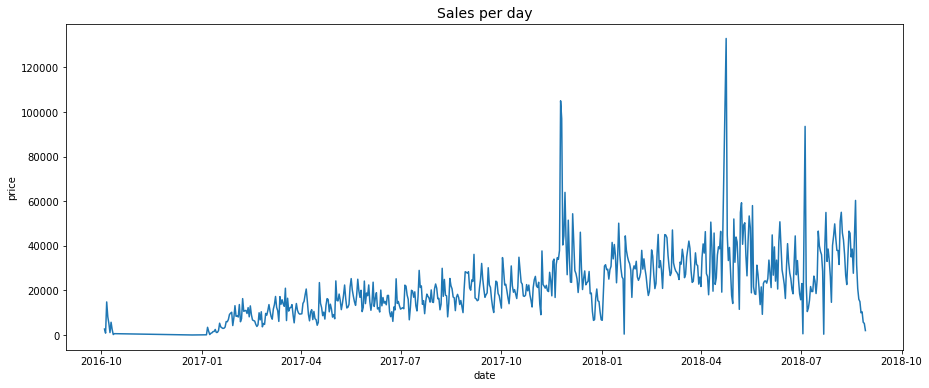

In [187]:
# creating a day approved order feature
df_train['date'] = df_train.order_approved_at.dt.date

# creating an aggregation
sales_per_date = df_train.groupby('date', as_index=False).price.sum()

plt.figure(figsize=(15,6))
ax = sns.lineplot(x="date", y="price", data=sales_per_date)
ax.set_title('Sales per day',  fontsize=14)

Text(0.5, 1.0, 'Sales per week')

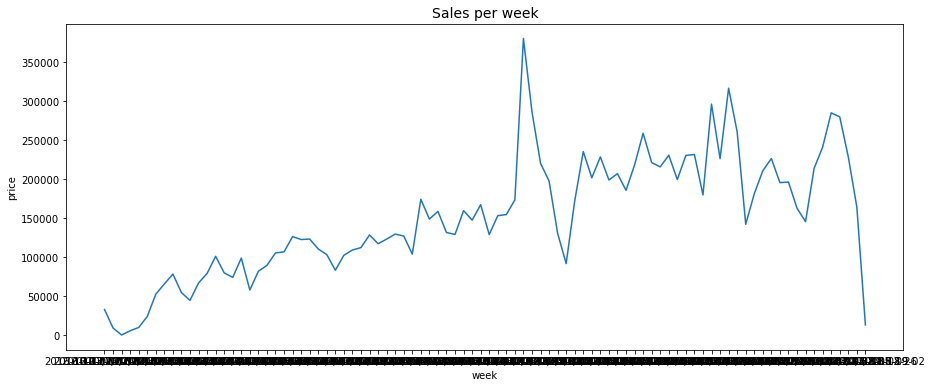

In [190]:
# creating a week approved order feature
df_train['week'] = df_train.order_approved_at.dt.to_period('W').astype(str)

# creating an aggregation
sales_per_month = df_train.groupby('week', as_index=False).price.sum()

plt.figure(figsize=(15,6))
ax = sns.lineplot(x="week", y="price", data=sales_per_month)
ax.set_title('Sales per week',  fontsize=14)

Text(0.5, 1.0, 'Sales per month')

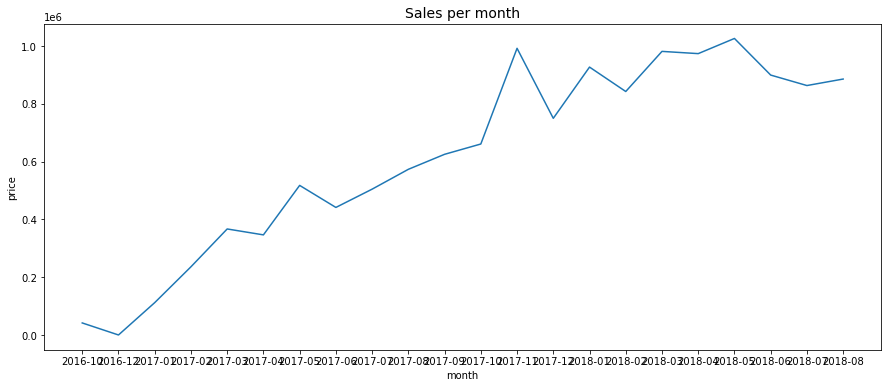

In [191]:
# creating a week approved order feature
df_train['month'] = df_train.order_approved_at.dt.to_period('M').astype(str)

# creating an aggregation
sales_per_month = df_train.groupby('month', as_index=False).price.sum()

plt.figure(figsize=(15,6))
ax = sns.lineplot(x="month", y="price", data=sales_per_month)
ax.set_title('Sales per month',  fontsize=14)